# Ejercicio 4
* Para los datos de 'Coactivation_matrix.mat', filtre la matriz para obtener los valores > 0.2, con el nuevo arreglo muestre los nodos y vértices del grafo


In [43]:
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np

In [45]:
path = r"Coactivation_matrix.mat"
mat = scipy.io.loadmat(path)
matrix = mat["Coactivation_matrix"] 

In [47]:
threshold = 0.2
filt_matrix = np.where(matrix > threshold, matrix, 0)

In [51]:
filt_matrix = np.array(filt_matrix)
G = nx.from_numpy_array(filt_matrix)

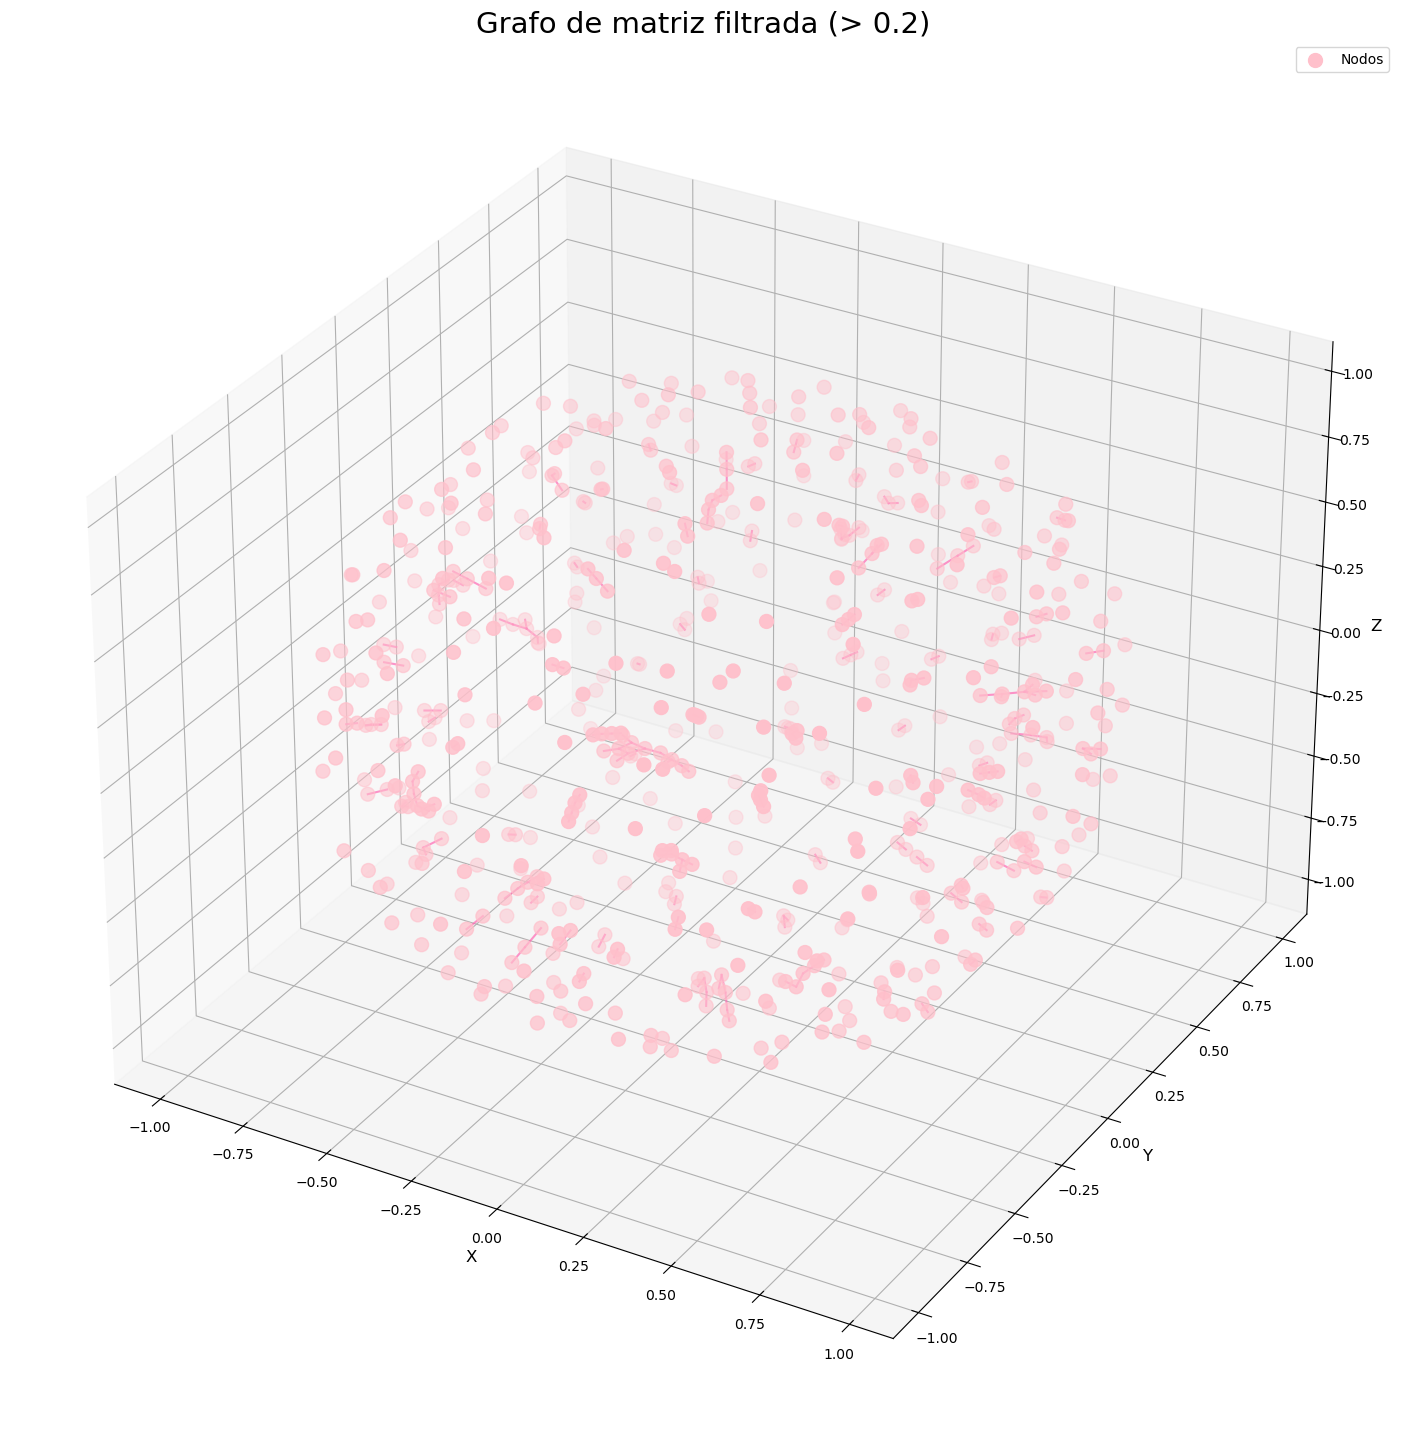

In [72]:
pos_3d = nx.spring_layout(graph, dim=3, seed=42)  

x = [pos[0] for pos in pos_3d.values()]
y = [pos[1] for pos in pos_3d.values()]
z = [pos[2] for pos in pos_3d.values()]

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x, y, z, s=100, c="pink", label="Nodos")

for edge in graph.edges():
    x_coords = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y_coords = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z_coords = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, c="hotpink", alpha=0.7)

ax.set_title("Grafo de matriz filtrada (> 0.2)", fontsize=21)
ax.set_xlabel("X", fontsize=12)
ax.set_ylabel("Y", fontsize=12)
ax.set_zlabel("Z", fontsize=12)
ax.legend()
plt.show()